<h1 style="text-align:center;">Heart Failure Prediction</h1>
<p align="center">
  <img src="stroke.jpg" width="700" height="300">
</p>

##  Business Overview:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information

1. **Age**: age of the patient [years]
2. **Sex**: sex of the patient [M: Male, F: Female]
3. **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. **RestingBP**: resting blood pressure [mm Hg]
5. **Cholesterol**: serum cholesterol [mm/dl]
6. **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
9. **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
10. **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
11. **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. **HeartDisease**: output class [1: heart disease, 0: Normal]

## Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

**Total:** 1190 observations

**Duplicated:** 272 observations

**Final dataset:** 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: [UCI Heart Disease Datasets](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)

1. [Data Overview](#data-overview)
2. [Importing Libraries](#importing-libraries)
3. [Data Cleaning & Preprocessing](#data-cleaning-and-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Univariate Analysis](#univariate-analysis)
    - [Bivariate Analysis](#bivariate-analysis)
    - [Multivariate Analysis](#multivariate-analysis)
5. [Data Encoding](#data-encoding)
6. [Data Scaling](#data-scaling)
7. [Data Modeling](#data-modeling)
8. [Model Evaluation](#model-evaluation)
9. [Pipeline](#pipeline)
10. [Deployment](#deployment)

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    🤗 Adding libraries
</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Reading the data
</div>

In [2]:
df = pd.read_csv('heart.csv')    
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info() # to check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe().T # to get a statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
df.describe(include='object').T # to get a statistical summary of the data  

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Data Cleaning 
</div>

In [6]:
df.duplicated().sum() # to check for duplicate rows

0

In [7]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent =  df.isnull().sum() / len(df) * 100
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
missing_values_table(df)

The dataset has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Checking the unique values 
</div>

In [8]:
for col in df.columns:
    print(col, df[col].unique())    

Age [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingBP [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Handling the outliers of numerical columns 
</div>

In [10]:
from datasist.structdata import detect_outliers # to detect outliers in the numerical columns
outliers = detect_outliers(df,0,df[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]])
len(outliers) / len(df) * 100 # to check the percentage of outliers in the dataset

35.947712418300654

In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
num_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
cat_cols = ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina','ST_Slope']

In [13]:
#  Calculate the IQR of the numerical columns, then replace the outliers with the lower and upper limits
for col in ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
df[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.000,47.00,54.0,60.0,77.000
RestingBP,918.0,132.125272,16.993314,90.000,120.00,130.0,140.0,170.000
Cholesterol,918.0,203.985158,95.922341,32.625,173.25,223.0,267.0,407.625
FastingBS,918.0,0.000000,0.000000,0.000,0.00,0.0,0.0,0.000
MaxHR,918.0,136.819172,25.432057,66.000,120.00,138.0,156.0,202.000
Oldpeak,918.0,0.877778,1.031693,-2.250,0.00,0.6,1.5,3.750


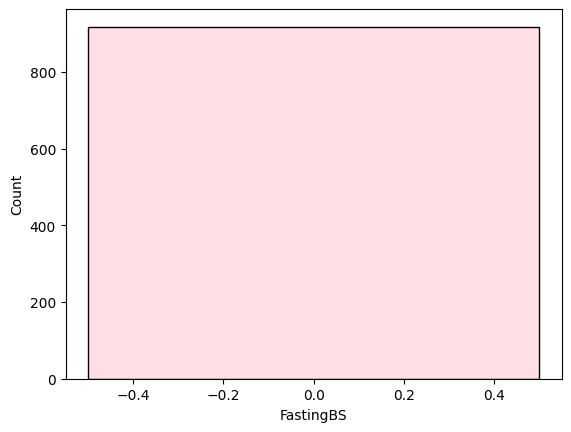

In [19]:
sns.histplot(df['FastingBS'], kde=True, color='pink')
plt.show()

In [21]:
# Consider removing Fasting Blood Sugar
df = df.drop('FastingBS', axis=1)
df.reset_index(drop=True, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,Normal,122.0,N,0.0,Up,0


In [25]:
num_cols = ["Age", "RestingBP", "Cholesterol",  "MaxHR", "Oldpeak"]
cat_cols = ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina','ST_Slope']

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    EDA  
</div>

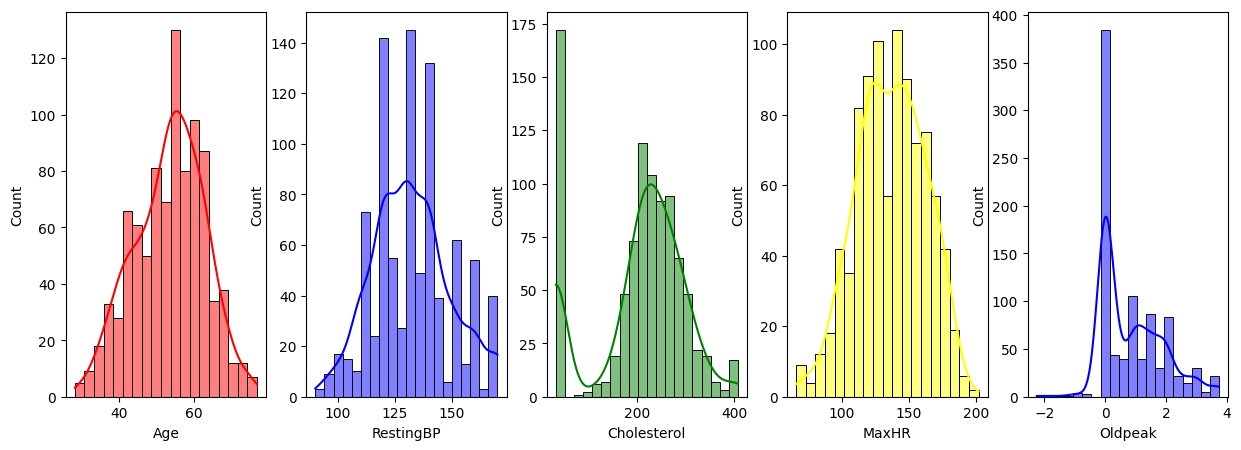

In [20]:
# Check for the distribution of the numerical columns
fig, ax = plt.subplots(1,5,figsize=(15,5))
sns.histplot(df['Age'], kde=True, ax=ax[0], color='red')
sns.histplot(df['RestingBP'], kde=True, ax=ax[1], color='blue')
sns.histplot(df['Cholesterol'], kde=True, ax=ax[2], color='green')
sns.histplot(df['MaxHR'], kde=True, ax=ax[3], color='yellow') RestingBP 'MaxHR'
sns.histplot(df['Oldpeak'], kde=True, ax=ax[4], color='blue')
plt.show()

## Exploratory Data Analysis for Heart Failure Prediction

The provided histograms with overlaid KDE plots show the distribution of several important clinical variables within a dataset. Understanding these distributions is essential for building a predictive model for heart failure.

### Variables:
- **Age**: The distribution of age is approximately normal, with a peak in middle-aged individuals.
- **RestingBP**: Most individuals have a resting blood pressure around a central value, suggesting a normal distribution.
- **Cholesterol**: The cholesterol levels are also roughly normally distributed, with a slight right skew indicating the presence of individuals with high cholesterol levels.
- **MaxHR**: The maximum heart rate variable follows a normal distribution, centering on a mean value.
- **Oldpeak**: There is a significant right skew in the 'oldpeak' values, which are mostly concentrated near zero.



In [27]:
# Boxplot of the numerical columns
for col in num_cols:
    px.box(df , x = df[col], title = f"Box Plot of {col}", template = "plotly_dark").show()

In [28]:
# Check for the distribution of the categorical columns
for col in cat_cols:
   fig =  px.histogram(df, x=col, title=f'Distribution of {col}', color=col, template='plotly_dark')
   fig.show()

In [29]:
for col in cat_cols:
    fig = px.pie(df, names=col, title=f'Distribution of {col}', hole=0.3, template='plotly_dark')   
    fig.show()

In [30]:
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [33]:
# Bi-variate Analysis of the numerical columns
fig = px.scatter(df, x='Age', y='Cholesterol', color='HeartDisease', template='plotly_dark')
fig.show()

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Hypothesis Testing  
</div>

In [34]:
for col in num_cols:
    fig = px.histogram(df, x=col, color='HeartDisease', barmode='group', template='plotly_dark')
    fig.show()

1. Is there a difference in mean age between patients with and without heart disease?

- Null Hypothesis (H0): There is no difference in mean age between patients with and without heart disease.
- Alternative Hypothesis (H1): There is a difference in mean age between patients with and without heart disease.

In [37]:
# t_test for Age , RestingBP, MaxHR  with heart disease 
from scipy.stats import ttest_ind
for col in num_cols:
    t_test, p_value = ttest_ind(df[df['HeartDisease'] == 0][col], df[df['HeartDisease'] == 1][col])
    print(f"t-test for {col} with Heart Disease: {t_test}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"There is a significant difference in the means of {col} between the two groups")



t-test for Age with Heart Disease: -8.897234373161165, p-value: 3.0079532400497047e-18
There is a significant difference in the means of Age between the two groups
t-test for RestingBP with Heart Disease: -3.44795283597912, p-value: 0.0005905746331927714
There is a significant difference in the means of RestingBP between the two groups
t-test for Cholesterol with Heart Disease: 6.9988927263381235, p-value: 4.9828791468476145e-12
There is a significant difference in the means of Cholesterol between the two groups
t-test for MaxHR with Heart Disease: 13.229373104675435, p-value: 1.0894955874479748e-36
There is a significant difference in the means of MaxHR between the two groups
t-test for Oldpeak with Heart Disease: -13.613330285766859, p-value: 1.4348028058216667e-38
There is a significant difference in the means of Oldpeak between the two groups


2. Does the type of chest pain relate to the presence of heart disease?

- Null Hypothesis (H0): There is no association between the type of chest pain and the presence of heart disease.
- Alternative Hypothesis (H1): There is an association between the type of chest pain and the presence of heart disease.

In [38]:
# Does the type of chest pain relate to the presence of heart disease?
from scipy.stats import chi2_contingency
contingency_table_chest = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
# Is exercise-induced angina more prevalent in patients with heart disease?
contingency_table_angina = pd.crosstab(df['ExerciseAngina'], df['HeartDisease'])

if chi2_contingency(contingency_table_chest)[1] < 0.05:
    print("There is a significant relationship between ChestPainType and HeartDisease")
else:
    print("There is no significant relationship between ChestPainType and HeartDisease")

if chi2_contingency(contingency_table_angina)[1] < 0.05:
    print("There is a significant relationship between angina and HeartDisease")
else:
    print("There is no significant relationship between angina and HeartDisease")

There is a significant relationship between ChestPainType and HeartDisease
There is a significant relationship between angina and HeartDisease


In [40]:
# Bi-variate Analysis of the categorical columns

for col in cat_cols:
    fig = px.histogram(df, x=col, color='HeartDisease', barmode='group', template='plotly_dark')
    fig.show()
    

In [41]:
for col in num_cols:
    px.box(df, x='HeartDisease', y=col, color='HeartDisease', template='plotly_dark').show()    

<p style = "color: #0B666A;
            font: bold 22px tahoma;
            padding: 16px;
            background-color: #111;
            border: 5px solid #0B666A;
            border-radius: 8px;
            text-align:center;">
    ♣ Frequency of "chest pain types" among patients with heart disease
</p>

In [42]:
frequency = df["HeartDisease"] == 1
dff = df[frequency].copy()
chest_pain_with_disease = dff["ChestPainType"].value_counts(normalize=1)*100
chest_pain_with_disease

ChestPainType
ASY    77.165354
NAP    14.173228
ATA     4.724409
TA      3.937008
Name: proportion, dtype: float64

<p style = "color: #0B666A;
            font: bold 22px tahoma;
            padding: 16px;
            background-color: #111;
            border: 5px solid #0B666A;
            border-radius: 8px;
            text-align:center;">
    ♣ 392 heart diseased patients were a "asymptomatic"
</p>

In [43]:
correlations = df.corr(numeric_only=True)
fig = px.imshow(correlations, template='plotly_dark', aspect=True, text_auto="0.3f")
fig.show()

In [45]:
px.scatter(
    data_frame=df,
    x = "Age",
    y = "RestingBP",
    trendline="ols",
    color = "HeartDisease",
    template="plotly_dark",
    color_continuous_scale="RdBu",
    title="Blood Pressure & Age"
)

In [47]:
px.scatter(
    data_frame=df,
    x = "Age",
    y = "MaxHR",
    trendline="ols",
    color = "HeartDisease",
    template="plotly_dark",
    color_continuous_scale="RdBu",)

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Splitting the data 
</div>

In [48]:
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [49]:
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [50]:
for col in cat_cols:
    print(df[col].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [51]:
ohe_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [53]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [55]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.pipeline import Pipeline

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Building The Pipeline  
</div>

In [56]:
num_pipeline = Pipeline([ ('imputer', KNNImputer(n_neighbors=5)), ('scaler', RobustScaler())])
num_pipeline

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', RobustScaler())])

In [57]:
cat_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('encoder', OneHotEncoder(handle_unknown='ignore'))])
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [58]:
preprocessor = ColumnTransformer([ ('num', num_pipeline, num_cols), ('cat', cat_pipeline, ohe_cols)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope'])])

In [59]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [60]:
y.value_counts(normalize= True) * 100

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

In [62]:
# If you will use smote in your pipeline, you should use imblearn pipeline not sklearn
from imblearn.pipeline import Pipeline
final_pipeline = Pipeline(steps= [('Preprocessing' , preprocessor), ('smote', SMOTE()), ('Model', LogisticRegression())])
final_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('smote', SMOTE()), ('Model', LogisticRegression())])

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm
from catboost import CatBoostClassifier

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Model Performance  
</div>

In [64]:
from sklearn.model_selection import cross_validate
models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Knn", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Ada boost", AdaBoostClassifier()))
models.append(("Xgb", XGBClassifier()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("lightGBM", lightgbm.LGBMClassifier()))
models.append(("CatBoost", CatBoostClassifier()))

for model in models:
    final_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', model[1])])
    result = cross_validate(final_pipeline, x, y, scoring= 'f1', cv= 5, return_train_score= True, n_jobs= -1)
    print(model[0])
    print('Train F1 Score : ', result['train_score'].mean() * 100)
    print('Test F1 Score : ', result['test_score'].mean() * 100)

Logistic Regression
Train F1 Score :  87.66406548534027
Test F1 Score :  82.52957871040978
Knn
Train F1 Score :  91.08397300534563
Test F1 Score :  83.3117902197188
Decision Tree
Train F1 Score :  100.0
Test F1 Score :  74.24011413605858
Random Forest
Train F1 Score :  100.0
Test F1 Score :  84.18534432011397
Ada boost
Train F1 Score :  89.77739584963533
Test F1 Score :  81.08090186125662
Xgb
Train F1 Score :  100.0
Test F1 Score :  82.46199811959384
Naive Bayes
Train F1 Score :  87.06652037107929
Test F1 Score :  84.20778664096382
lightGBM
Train F1 Score :  100.0
Test F1 Score :  83.7521127593304
CatBoost
Train F1 Score :  97.97324820715471
Test F1 Score :  84.10704133461451


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Hyperparameter tuning for Random Forest  
</div>

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'Model__n_estimators': [100, 200, 300],
         'Model__max_depth': [5, 6, 7]}

RF_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', RandomForestClassifier())])

grid_search= GridSearchCV(param_grid= params, estimator = RF_pipeline, scoring= 'f1', cv= 5,
                          return_train_score= True, n_jobs= -1)

In [67]:
grid_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'MaxHR',
                                                                          'Oldpeak']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('smote', SMOTE()),
                                       ('Model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'Model__max_depth': [5, 6, 7],
                         'Model__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='f1')

In [73]:
grid_search.best_params_

{'Model__max_depth': 5, 'Model__n_estimators': 100}

In [69]:
grid_search.cv_results_['mean_train_score'].mean() * 100

93.26818513403275

In [70]:
grid_search.cv_results_['mean_test_score'].mean() * 100

84.66529432726124

In [71]:
y_pred = grid_search.predict(x) 
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       410
           1       0.90      0.93      0.91       508

    accuracy                           0.90       918
   macro avg       0.90      0.90      0.90       918
weighted avg       0.90      0.90      0.90       918



In [78]:
# Try XGB
XGB_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model',  XGBClassifier())]) 

# Used Hyperparameter
param_grid = {
    'Model__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'Model__max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'Model__gamma': [0, 0.25, 0.4, 0.5, 1.0],
    'Model__min_child_weight': [1, 3, 5, 7],
    'Model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'Model__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Cross Validation  
</div>

In [82]:
random_search = RandomizedSearchCV(XGB_pipeline, param_distributions=param_grid, n_iter=35, 
                                   scoring="roc_auc", cv=5, verbose=0, random_state=99)
random_search.fit(x, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Age',
                                                                                'RestingBP',
                                                                                'Cholesterol',
                                                                                'MaxHR',
                                                                                'Oldpeak']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore...
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=35,
                   param_distributions={'Model__colsample_bytree': [0.4, 0.5,
                                                                    0.6, 0.7,
                                                                    0.8, 0.9,
                                                                    1.0],
                                        'Model__gamma': [0, 0.25, 0.4, 0.5,
                                                         1.0],
                                        'Model__learning_rate': [0.01, 0.1, 0.2,
                                                                 0.3],
                                        'Model__max_depth': [3, 4, 5, 6, 8, 10,
                                                             12, 15],
                                        'Model__min_child_weight': [1, 3, 5, 7],
                                        'Model__subsample': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0]},
                   random_state=99, scoring='roc_auc')

In [83]:
random_search.best_params_

{'Model__subsample': 0.5,
 'Model__min_child_weight': 1,
 'Model__max_depth': 15,
 'Model__learning_rate': 0.01,
 'Model__gamma': 1.0,
 'Model__colsample_bytree': 0.4}

In [86]:
XGB_Model = Pipeline(steps=[('preprocessing', preprocessor),
                             ('smote', SMOTE()), ('Model',  XGBClassifier(objective="binary:logistic",
subsample=0.5,
min_child_weight=1,
max_depth=15,
learning_rate=0.01,
gamma=1.0,
colsample_bytree=0.4))]) 
XGB_Model.fit(x, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'Rest...
                               feature_types=None, gamma=1.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=15, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [87]:
XGB_Model.fit(x, y)
train_score = XGB_Model.score(x, y)*100
print(f"TRAIN SCORE {train_score:0.2f}%")

TRAIN SCORE 90.41%


In [88]:
prediction = XGB_Model.predict(x)
test_score = f1_score(y, prediction)*100    
print(f"TEST SCORE {test_score:0.2f}%")

TEST SCORE 91.47%


In [89]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       410
           1       0.90      0.93      0.91       508

    accuracy                           0.90       918
   macro avg       0.90      0.90      0.90       918
weighted avg       0.90      0.90      0.90       918



In [91]:
# Confusion Matrix
cm = confusion_matrix(y, prediction)
ticks = df["HeartDisease"].map({0:"No Heart Disease", 1:"Heart Disease"}).unique()
px.imshow(cm, labels=dict(x="Predicted", y="Actual", color="Counts"), x=ticks, y=ticks, title="Confusion Matrix", template="plotly_dark",text_auto=True)


# Confusion Matrix Explanation

The image displays a confusion matrix, which is a table often used to describe the performance of a classification model on a set of test data for which the true values are known. This particular confusion matrix is for a model predicting heart disease.

Here is the breakdown of the matrix components:

- The x-axis represents the predicted classifications (No Heart Disease, Heart Disease).
- The y-axis represents the actual classifications.

The matrix is divided into four quadrants:
1. **True Negatives (Top-Left Quadrant):**
   - Actual: No Heart Disease
   - Predicted: No Heart Disease
   - Count: 358
   - This represents the number of instances where the model correctly predicted the absence of heart disease.

2. **False Positives (Top-Right Quadrant):**
   - Actual: No Heart Disease
   - Predicted: Heart Disease
   - Count: 52
   - This represents the number of instances where the model incorrectly predicted heart disease when there was none.

3. **False Negatives (Bottom-Left Quadrant):**
   - Actual: Heart Disease
   - Predicted: No Heart Disease
   - Count: 36
   - This is a critical error as the model failed to identify heart disease when it was present.

4. **True Positives (Bottom-Right Quadrant):**
   - Actual: Heart Disease
   - Predicted: Heart Disease
   - Count: 472
   - This represents the number of instances where the model correctly identified the presence of heart disease.

On the right, there is a color-coded scale indicating the counts of each category, ranging from yellow for lower counts to dark purple for higher counts.

The goal of a good classification model is to maximize the number of True Positives and True Negatives while minimizing the number of False Positives and False Negatives. This model appears to have a high number of True Positives and True Negatives, indicating it performs well on this dataset.


<p style = "color: #247881;
            font: bold 20px tahoma;
            background-color: #fff;
            padding: 18px;
            border: 6px solid #247881;
            border-radius: 8px"> 
    🚀 Accuracy: Approximately 90.41%
    <br>
    <br>
    🚀 Precision: Approximately 90.08%
    <br>
    <br>
    🚀 Recall: Approximately 92.91%
    <br>
    <br>
    🚀 F1 Score: Approximately 91.47%
</p>

In [92]:
# Precision-Recall Trade-off
# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y, XGB_Model.predict_proba(x)[:,1])

# Plot the precision-recall curve
fig = px.area(x=recall, y=precision, title="Precision-Recall Curve", labels=dict(x="Recall", y="Precision"), template="plotly_dark")
fig.update_traces(fill="tozeroy")
fig.show()

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Deployment  
</div>

In [94]:
# Save pipeline as pkl file
import joblib
joblib.dump(XGB_Model, "HeartDisease.pkl")

['HeartDisease.pkl']

In [95]:
# save the clean data as csv file 
df.to_csv('clean_heart.csv', index=False)


In [96]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.000,47.00,54.0,60.0,77.000
RestingBP,918.0,132.125272,16.993314,90.000,120.00,130.0,140.0,170.000
Cholesterol,918.0,203.985158,95.922341,32.625,173.25,223.0,267.0,407.625
MaxHR,918.0,136.819172,25.432057,66.000,120.00,138.0,156.0,202.000
Oldpeak,918.0,0.877778,1.031693,-2.250,0.00,0.6,1.5,3.750


In [97]:
for col in ohe_cols:
    print(df[col].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [98]:
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [101]:
%%writefile Heart_deployment.py

# Importing Required Libraries
import streamlit as st
import pandas as pd
import plotly.express as px
import joblib
import numpy as np
import warnings

def run():
    st.set_page_config(page_title="Heart Disease Prediction", page_icon="❤️", layout="wide")
    warnings.simplefilter(action='ignore', category=FutureWarning)

    select_page = st.sidebar.radio('Select page', ['Analysis', 'Model Classification', 'About'])

    if select_page == 'Analysis':
        cleaned_data = pd.read_csv('clean_heart.csv')
        st.image('https://th.bing.com/th/id/OIP.nCkh1m-FQ0zwXAv0-9HY6QHaFi?rs=1&pid=ImgDetMain', width=700)
        st.write('### Dataset Overview')
        st.dataframe(cleaned_data.head(10))

        # Create tabs for analysis
        tab1, tab2, tab3 = st.tabs(['Univariate Analysis', 'Bivariate Analysis', 'Multivariate Analysis'])

        # Univariate Analysis for Categorical Features
        tab1.write('### Univariate Analysis with Histogram for Categorical Features')
        categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
        for col in categorical_cols:
            fig = px.histogram(cleaned_data, x=col, color=col)
            tab1.plotly_chart(fig, use_container_width=True)

        # Bivariate and Multivariate Analysis for Numerical Features
        numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
        tab2.write('### Bivariate Analysis: Numerical Features vs Heart Disease')
        select_feature = tab2.selectbox('Select Feature', numerical_cols)
        fig2 = px.box(cleaned_data, x='HeartDisease', y=select_feature, color='HeartDisease')
        tab2.plotly_chart(fig2, use_container_width=True)

        tab3.write('### Correlation Heatmap for Numerical Features')
        corr_matrix = cleaned_data[numerical_cols].corr()
        fig3 = px.imshow(corr_matrix, text_auto=True, color_continuous_scale='RdBu_r')
        tab3.plotly_chart(fig3, use_container_width=True)

    elif select_page == 'Model Classification':
        st.title('Heart Disease Prediction Model')
        st.image('stroke.jpg', width=700)

        # Load the model
        model = joblib.load('HeartDisease.pkl')

        # Input fields for model prediction
        inputs = collect_user_input()

        if st.button('Predict'):
            df = pd.DataFrame([inputs])
            result = model.predict(df)[0]
            display_prediction(result)

    elif select_page == 'About':
        display_about_info()

    
    display_footer()

def collect_user_input():
    st.sidebar.header('Enter Your Health Details:')
    inputs = {
        'Sex': st.sidebar.selectbox('Sex', ['M', 'F']),
        'Age': st.sidebar.slider('Age', 28, 77, 54),
        'ChestPainType': st.sidebar.selectbox('Chest Pain Type', ['ASY', 'NAP', 'ATA', 'TA']),
        'RestingBP': st.sidebar.slider('Resting Blood Pressure', 90, 170, 130),
        'Cholesterol': st.sidebar.slider('Cholesterol', 33, 408, 224),
        'FastingBS': st.sidebar.selectbox('Fasting Blood Sugar > 120 mg/dl', [0, 1]),
        'RestingECG': st.sidebar.selectbox('Resting ECG', ['Normal', 'LVH', 'ST']),
        'MaxHR': st.sidebar.slider('Maximum Heart Rate Achieved', 66, 202, 139),
        'ExerciseAngina': st.sidebar.selectbox('Exercise Induced Angina', ['N', 'Y']),
        'Oldpeak': st.sidebar.slider('ST Depression Induced by Exercise', -2.25, 3.75, 0.6),
        'ST_Slope': st.sidebar.selectbox('Slope of the Peak Exercise ST Segment', ['Up', 'Flat', 'Down'])
    }
    return inputs

def display_prediction(result):
    if result == 1:
        st.error("Prediction: High risk of heart disease.")
        st.markdown(health_advice(True))
    else:
        st.success("Prediction: Low risk of heart disease.")
        st.markdown(health_advice(False))

def health_advice(high_risk):
    if high_risk:
        return """
        ### Health Advice for High-Risk Individuals
        If you're at high risk of heart disease, it's crucial to consult with a healthcare provider for a detailed assessment and personalized advice. Consider adopting a heart-healthy lifestyle:
        - Maintain a balanced diet low in saturated fats, cholesterol, and sodium.
        - Engage in regular physical activity.
        - Avoid smoking and limit alcohol intake.
        - Monitor and manage your blood pressure, cholesterol levels, and diabetes.
        """
    else:
        return """
        ### Health Advice for Low-Risk Individuals
        To maintain a low risk of heart disease, continue practicing a healthy lifestyle:
        - Eat a diet rich in fruits, vegetables, and whole grains.
        - Stay active with regular exercise.
        - Avoid smoking and excessive alcohol consumption.
        - Keep up with regular health check-ups.
        """

def display_about_info():
    st.title('About Heart Disease Prediction')
    st.markdown("""
        ## Background and Problem Statement

        Heart disease is a major global health issue, leading to significant morbidity and mortality. Early detection and management can greatly improve outcomes for individuals at risk. This app aims to leverage machine learning to predict heart disease risk based on health and lifestyle factors, facilitating early intervention and awareness.
    """)

def display_footer():
    st.image("Ibrahim.jpg", width=200)
    st.markdown("Developed by Ibrahim Abdelnasar Yakout.")
    st.markdown("[LinkedIn](https://www.linkedin.com/in/ibrahim-abdelnasar/) | [Facebook](https://www.facebook.com/profile.php?id=100005030929252&mibextid=sCpJLy)")

if __name__ == '__main__':
    run()


Writing Heart_deployment.py


In [102]:
! streamlit run Heart_deployment.py

^C
